<a href="https://colab.research.google.com/github/sergio-cabrales/python-semana-4/blob/main/MachineLearningFULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ta

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=18078383f0eb0208ce877b127e22b94cb14a7bb20e59e58e9fd28976039e9961
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [ ]:
# Import the libraries
import pandas as pd
import pandas_datareader as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

from ta import add_all_ta_features
from ta.utils import dropna

In [ ]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2010-01-01', end='2021-06-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.572422
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.583784
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.479061
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.467082
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.510078
...,...,...,...,...,...,...
2021-06-11,127.440002,126.099998,126.529999,127.349998,53415300.0,127.349998
2021-06-14,130.539993,127.070000,127.820000,130.479996,96906500.0,130.479996
2021-06-15,130.600006,129.389999,129.940002,129.639999,62746300.0,129.639999


In [ ]:
# Clean NaN values
df = dropna(df)

In [ ]:
 add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

/usr/local/lib/python3.7/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.7/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.572422,2.654966e+08,4.937296e+08,NaN,NaN,NaN,NaN,NaN,-3.933157e+08,1000.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.705357,7.553929,NaN,0.589623,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.622857,37.400044,36.423377,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.649642,NaN,0.000000
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.583784,2.449217e+08,1.095634e+09,NaN,NaN,NaN,0.000486,NaN,-3.922132e+08,1000.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.723155,7.563869,NaN,0.581092,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.642322,37.400044,36.423377,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.172893,0.172744,0.172893
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.479061,-2.530072e+08,5.434744e+08,NaN,NaN,NaN,-0.001480,NaN,-7.742184e+06,984.093676,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.729683,7.516825,NaN,0.083708,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.613214,37.400044,36.423377,NaN,NaN,NaN,NaN,7.660714,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.590632,-1.603419,-1.420489
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.467082,-2.352198e+08,6.634320e+07,NaN,NaN,NaN,-0.001944,NaN,-9.664913e+06,982.274372,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.703453,7.491131,NaN,0.139331,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.582857,37.400044,36.423377,NaN,NaN,NaN,NaN,7.699643,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.184871,-0.185042,-1.602734
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.510078,2.062968e+08,5.139540e+08,NaN,NaN,NaN,0.000004,NaN,2.093787e+06,988.804857,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.691000,7.479143,NaN,0.432230,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.582857,37.400044,36.423377,NaN,NaN,NaN,NaN,7.690300,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.664833,0.662633,-0.948557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-11,127.440002,126.099998,126.529999,127.349998,53415300.0,127.349998,2.490101e+10,1.581882e+10,-0.074223

In [ ]:
# Create the Target column
# df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df['Target'] = np.where(df['Close'] > df['Open'], +1, -1)
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,...,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,Target
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.572422,2.654966e+08,4.937296e+08,NaN,NaN,NaN,NaN,NaN,-3.933157e+08,1000.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.705357,7.553929,NaN,0.589623,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.622857,37.400044,36.423377,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.649642,NaN,0.000000,1
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.583784,2.449217e+08,1.095634e+09,NaN,NaN,NaN,0.000486,NaN,-3.922132e+08,1000.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.723155,7.563869,NaN,0.581092,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.642322,37.400044,36.423377,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.172893,0.172744,0.172893,-1
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.479061,-2.530072e+08,5.434744e+08,NaN,NaN,NaN,-0.001480,NaN,-7.742184e+06,984.093676,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.729683,7.516825,NaN,0.083708,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.613214,37.400044,36.423377,NaN,NaN,NaN,NaN,7.660714,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.590632,-1.603419,-1.420489,-1
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.467082,-2.352198e+08,6.634320e+07,NaN,NaN,NaN,-0.001944,NaN,-9.664913e+06,982.274372,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.703453,7.491131,NaN,0.139331,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.582857,37.400044,36.423377,NaN,NaN,NaN,NaN,7.699643,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.184871,-0.185042,-1.602734,-1
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.510078,2.062968e+08,5.139540e+08,NaN,NaN,NaN,0.000004,NaN,2.093787e+06,988.804857,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,7.691000,7.479143,NaN,0.432230,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.582857,37.400044,36.423377,NaN,NaN,NaN,NaN,7.690300,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.664833,0.662633,-0.948557,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-11,127.440002,126.099998,126.529999,127.349998,53415300.0,127.349998,2.490101e+10,1.581882e+10,-0.074223,7.164696e+06,48.77025

In [ ]:
#Remove the first 29 days of data
df = df[100:]
# Clean NaN values
# df = dropna(df)
df = df.drop(columns=['High','Low','Open','Close','Volume','Adj Close'])
df

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,...,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,Target
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-05-27,8.543325e+09,7.458220e+09,0.089677,-2.304627e+06,55.492203,0.003258,0.000795,2.136941e+07,1277.321008,8.898299,0.376810,8.988286,9.555884,8.420687,12.629736,0.552791,0.0,0.0,8.845929,9.131643,8.560214,6.459797,0.853999,0.0,0.0,7.116071,9.663214,8.389642,28.338468,0.758553,6.220478,-0.023012,0.018878,-0.041890,8.924732,9.110604,8.890830,8.913842,38.154177,19.043429,...,0.028102,28.022789,10.084482,0.372072,-7.800759,23.321221,-31.121981,8.748214,8.423393,8.585803,8.423393,8.759911,8.055357,4.0,44.0,-40.0,7.933451,NaN,0.0,0.0,0.000229,53.064089,0.737535,0.497453,0.425573,-1.844365,57.188111,65.378871,60.931531,-34.621129,-0.240778,9.042622,-1.235784,6.129372,9.554750,-3.425378,3.785178,3.715298,18.382315,1
2010-05-28,8.679487e+09,8.273835e+09,0.125287,1.271405e+07,54.913007,0.004612,0.000235,3.658422e+07,1277.321008,8.906703,0.360736,8.980768,9.534152,8.427384,12.323756,0.674850,0.0,0.0,8.857631,9.140024,8.575238,6.376269,1.060663,1.0,0.0,7.116071,9.567143,8.341607,27.292457,0.839720,6.017890,0.001304,0.015363,-0.014059,8.909226,9.097431,8.934438,8.933134,36.889919,22.166156,...,0.017363,27.594564,56.633768,0.246375,-5.687214,16.282549,-21.969762,8.763393,8.423393,8.593393,8.423393,8.881786,8.227679,4.0,40.0,-36.0,7.994685,NaN,0.0,0.0,50.000114,55.541488,0.880590,0.657838,0.519915,0.040385,56.657327,75.869252,62.915830,-24.130748,-0.123630,9.044190,-1.987866,4.992889,8.642378,-3.649489,1.393335,1.383717,20.031777,-1
2010-06-01,8.272643e+09,9.150308e+09,0.090917,2.856136e+07,55.100056,0.006171,0.000313,2.484161e+07,1277.321008,8.923437,0.357020,8.970911,9.492147,8.449674,11.620591,0.830413,0.0,0.0,8.890512,9.167584,8.613440,6.232974,1.266670,1.0,0.0,7.116071,9.497857,8.306964,26.550101,0.923377,5.851270,0.031594,0.018609,0.012985,8.916577,9.083695,8.993041,8.961447,35.001530,25.434738,...,0.016970,27.289826,112.336363,0.094089,-5.970663,10.042110,-16.012772,8.880178,8.423393,8.651785,8.423393,8.978750,8.325714,12.0,36.0,-24.0,8.053469,NaN,0.0,0.0,75.000057,58.200193,1.000000,0.872709,0.676000,2.435402,59.585607,85.226955,75.491693,-14.773045,-0.046087,9.050563,0.956026,4.600913,7.834085,-3.233172,1.537682,1.525979,21.877484,1
2010-06-02,8.699334e+09,9.838856e+09,0.130253,3.544179e+07,55.249711,0.000095,-0.000033,2.171369e+07,1292.600172,8.928073,0.337282,8.980322,9.526736,8.433907,12.169161,0.908540,0.0,0.0,8.923738,9.187167,8.660309,5.904001,1.454809,1.0,0.0,7.116071,9.497857,8.306964,26.522278,0.970161,5.787356,0.063855,0.027658,0.036196,8.946726,9.076071,9.059771,8.995916,33.248025,24.581261,...,0.025912,26.921701,119.166301,0.098964,-4.948981,4.888576,-9.837556,8.880178,8.389642,8.634910,8.423393,8.989643,8.330714,8.0,32.0,-24.0,8.140132,NaN,0.0,0.0,87.500029,60.2236

In [ ]:
#Split tha data set into a feature or independent data set (X) and a Target or dependent data set (Y)
Y = df['Target'].values
Y

array([ 1, -1,  1, ..., -1, -1,  1])

In [ ]:
X = df.drop(columns='Target')
X

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-05-27,8.543325e+09,7.458220e+09,0.089677,-2.304627e+06,55.492203,0.003258,0.000795,2.136941e+07,1277.321008,8.898299,0.376810,8.988286,9.555884,8.420687,12.629736,0.552791,0.0,0.0,8.845929,9.131643,8.560214,6.459797,0.853999,0.0,0.0,7.116071,9.663214,8.389642,28.338468,0.758553,6.220478,-0.023012,0.018878,-0.041890,8.924732,9.110604,8.890830,8.913842,38.154177,19.043429,...,0.185869,0.028102,28.022789,10.084482,0.372072,-7.800759,23.321221,-31.121981,8.748214,8.423393,8.585803,8.423393,8.759911,8.055357,4.0,44.0,-40.0,7.933451,NaN,0.0,0.0,0.000229,53.064089,0.737535,0.497453,0.425573,-1.844365,57.188111,65.378871,60.931531,-34.621129,-0.240778,9.042622,-1.235784,6.129372,9.554750,-3.425378,3.785178,3.715298,18.382315
2010-05-28,8.679487e+09,8.273835e+09,0.125287,1.271405e+07,54.913007,0.004612,0.000235,3.658422e+07,1277.321008,8.906703,0.360736,8.980768,9.534152,8.427384,12.323756,0.674850,0.0,0.0,8.857631,9.140024,8.575238,6.376269,1.060663,1.0,0.0,7.116071,9.567143,8.341607,27.292457,0.839720,6.017890,0.001304,0.015363,-0.014059,8.909226,9.097431,8.934438,8.933134,36.889919,22.166156,...,0.063909,0.017363,27.594564,56.633768,0.246375,-5.687214,16.282549,-21.969762,8.763393,8.423393,8.593393,8.423393,8.881786,8.227679,4.0,40.0,-36.0,7.994685,NaN,0.0,0.0,50.000114,55.541488,0.880590,0.657838,0.519915,0.040385,56.657327,75.869252,62.915830,-24.130748,-0.123630,9.044190,-1.987866,4.992889,8.642378,-3.649489,1.393335,1.383717,20.031777
2010-06-01,8.272643e+09,9.150308e+09,0.090917,2.856136e+07,55.100056,0.006171,0.000313,2.484161e+07,1277.321008,8.923437,0.357020,8.970911,9.492147,8.449674,11.620591,0.830413,0.0,0.0,8.890512,9.167584,8.613440,6.232974,1.266670,1.0,0.0,7.116071,9.497857,8.306964,26.550101,0.923377,5.851270,0.031594,0.018609,0.012985,8.916577,9.083695,8.993041,8.961447,35.001530,25.434738,...,0.103399,0.016970,27.289826,112.336363,0.094089,-5.970663,10.042110,-16.012772,8.880178,8.423393,8.651785,8.423393,8.978750,8.325714,12.0,36.0,-24.0,8.053469,NaN,0.0,0.0,75.000057,58.200193,1.000000,0.872709,0.676000,2.435402,59.585607,85.226955,75.491693,-14.773045,-0.046087,9.050563,0.956026,4.600913,7.834085,-3.233172,1.537682,1.525979,21.877484
2010-06-02,8.699334e+09,9.838856e+09,0.130253,3.544179e+07,55.249711,0.000095,-0.000033,2.171369e+07,1292.600172,8.928073,0.337282,8.980322,9.526736,8.433907,12.169161,0.908540,0.0,0.0,8.923738,9.187167,8.660309,5.904001,1.454809,1.0,0.0,7.116071,9.497857,8.306964,26.522278,0.970161,5.787356,0.063855,0.027658,0.036196,8.946726,9.076071,9.059771,8.995916,33.248025,24.581261,...,0.014414,0.025912,26.921701,119.166301,0.098964,-4.948981,4.888576,-9.837556,8.880178,8.389642,8.634910,8.423393,8.989643,8.330714,8.0,32.0,

In [ ]:
X.fillna(X.mean(), inplace=True)

In [ ]:
# Split the data again but this time into 80% trading and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state =2)

In [ ]:
# Create and train the decision tree classsifier model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

In [ ]:
#Check how well the model did on the trainign data set
print(clf.score(X_train,Y_train))

1.0


In [ ]:
#Check how weel the model did on the testing data set
print(clf.score(X_test,Y_test))

0.7956989247311828


In [ ]:
#Show the model tree predictions
tree_predictions = clf.predict(X_test)
print(tree_predictions)

[-1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1
 -1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1
 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1  1  1
  1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1
  1  1 -1  1 -1 -1  1 -1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1  1
  1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1  1
  1 -1  1 -1  1 -1 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1 -1 -1 -1
  1 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1
 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1  1  1  1 -1
  1 -1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1
 -1  1  1  1  1  1  1 -1  1  1  1 -1 -1  1  1]


In [ ]:
Y_test

array([-1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
        1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,
       -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
        1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
        1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1,  1

In [ ]:
# Get the model metrics
# from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
#print(classification_report(Y_test, tree_predictions))
print(confusion_matrix(Y_test,tree_predictions))

[[104  35]
 [ 22 118]]


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, tree_predictions))

Accuracy: 0.7956989247311828


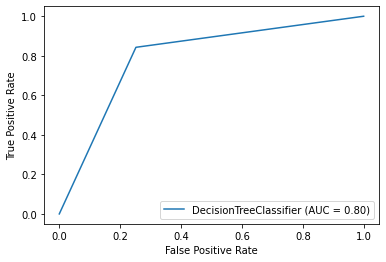

In [ ]:
# Get the model metrics
from sklearn.metrics import plot_roc_curve
metrics.plot_roc_curve(clf, X_test, Y_test)  
plt.show()

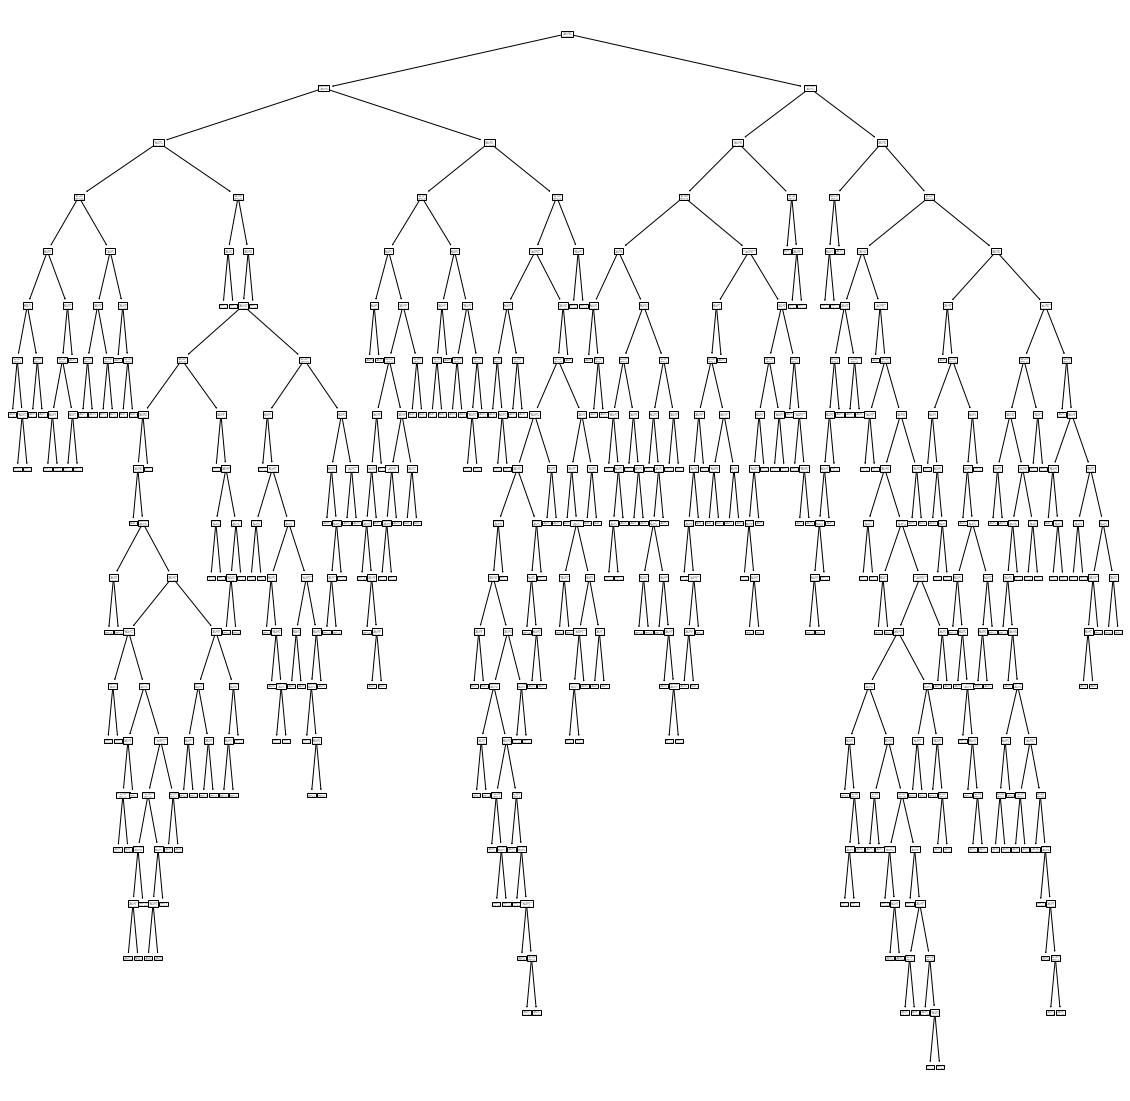

In [ ]:
# fn=['RSI','MACD']
# cn=['up', 'down']

plt.figure(figsize=(20, 20))
# tree.plot_tree(clf,1,feature_names= fn, class_names=cn, filled = True)
tree.plot_tree(clf)
plt.show()

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_81 <= 0.05
|   |--- feature_80 <= -0.44
|   |   |--- feature_6 <= -0.06
|   |   |   |--- feature_80 <= -1.00
|   |   |   |   |--- feature_68 <= 0.38
|   |   |   |   |   |--- feature_63 <= 0.50
|   |   |   |   |   |   |--- feature_8 <= 5170.77
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_8 >  5170.77
|   |   |   |   |   |   |   |--- feature_47 <= 12.32
|   |   |   |   |   |   |   |   |--- class: -1
|   |   |   |   |   |   |   |--- feature_47 >  12.32
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_63 >  0.50
|   |   |   |   |   |   |--- feature_19 <= 48.01
|   |   |   |   |   |   |   |--- class: -1
|   |   |   |   |   |   |--- feature_19 >  48.01
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_68 >  0.38
|   |   |   |   |   |--- feature_70 <= 54.53
|   |   |   |   |   |   |--- feature_76 <= -10.24
|   |   |   |   |   |   |   |--- feature_71 <= 2.54
|   |   |   |   |   |   |   |   |--- cl

In [ ]:
#A support vector machine (SVM) is a type of supervised machine learning classification algorithm.
from sklearn.svm import SVC
#svclassifier = SVC(kernel='linear')
# Polynomial Kernel
svclassifier  = SVC(kernel='poly', degree=8)
# Gaussian Kernel
#svclassifier = SVC(kernel='rbf')
# Sigmoid Kernel
#svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_predictions = svclassifier.predict(X_test)

In [ ]:
# Get the model metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, svm_predictions))
print(confusion_matrix(Y_test,svm_predictions))

              precision    recall  f1-score   support

          -1       0.80      0.03      0.06       139
           1       0.51      0.99      0.67       140

    accuracy                           0.51       279
   macro avg       0.65      0.51      0.36       279
weighted avg       0.65      0.51      0.36       279

[[  4 135]
 [  1 139]]


In [ ]:
#Check how weel the model did on the testing data set
print(svclassifier.score(X_test,Y_test))

0.5125448028673835


In [ ]:
# Multi-layer Perceptron (MLP) 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [ ]:
# ‘lbfgs’ is an optimizer in the family of quasi-Newton methods
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64,128,256), random_state=1)
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100), random_state=1)
clf.fit(scaled_X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 128, 256), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
NN = clf.predict(scaled_X_test)
NN

array([-1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,
        1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
        1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,
       -1,  1,  1, -1,  1

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, NN))

Accuracy: 0.8172043010752689


In [ ]:
# Get the model metrics
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(Y_test, NN))
print(confusion_matrix(Y_test,NN))

              precision    recall  f1-score   support

          -1       0.77      0.90      0.83       139
           1       0.88      0.74      0.80       140

    accuracy                           0.82       279
   macro avg       0.83      0.82      0.82       279
weighted avg       0.83      0.82      0.82       279

[[125  14]
 [ 37 103]]


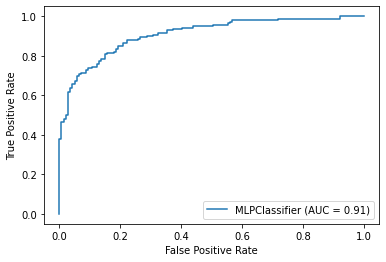

In [ ]:
# Get the model metrics
from sklearn.metrics import plot_roc_curve
metrics.plot_roc_curve(clf, scaled_X_test, Y_test)
plt.show()